# Logistic Regression with Python

## Import Libraries
Let's import some libraries to get started!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the Churn_modeling.csv file into a pandas dataframe.

In [5]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Logistic Regression/Churn_Modelling.csv')

In [6]:
Churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [8]:
Churn.iloc[0:10].isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
Churn.iloc[0:10,[3,6,7]].isnull()   #only showing for first 10 rows and selected 3 columns  #isnull is used in showing if there are any null values

,CreditScore,Age,Tenure
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


<AxesSubplot:>

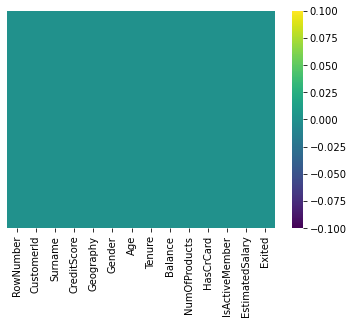

In [10]:
sns.heatmap(Churn.isnull(),yticklabels=False,cbar=True,cmap='viridis')  #easy way to check for any missing values in Churn
#as there are no missing cases the heatmap shows the colour of 0

No Missing cases...

<AxesSubplot:xlabel='Exited', ylabel='count'>

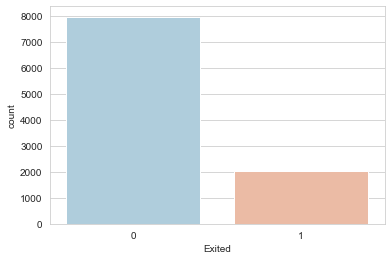

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=Churn,palette='RdBu_r')  #simple count of exited and non-exited people

<AxesSubplot:xlabel='Exited', ylabel='count'>

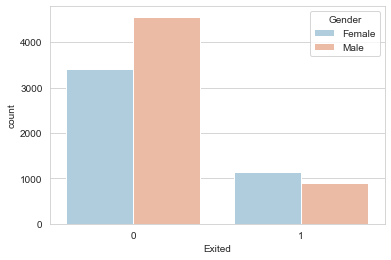

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=Churn,palette='RdBu_r')  #differentiated by gender

<AxesSubplot:xlabel='Exited', ylabel='count'>

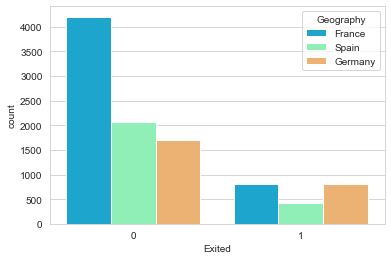

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Geography',data=Churn,palette='rainbow')   #differentiated by countries

In [ ]:
#Churn['Age'].hist(bins=30,color='darkred',alpha=0.7)

## Data Cleaning

In [13]:
to_drop=['RowNumber','CustomerId','Surname']   #not needed
Churn=Churn.drop(to_drop,axis=1)
Churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='Balance'>

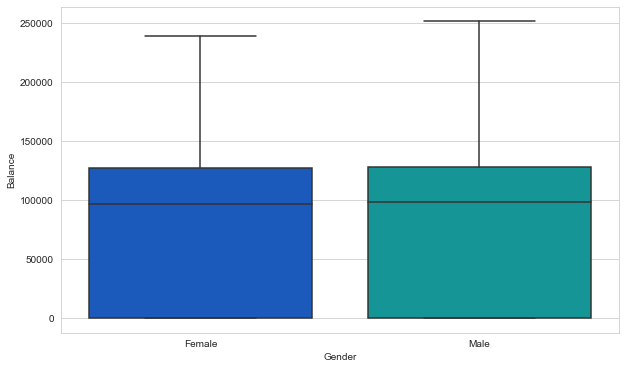

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender',y='Balance',data=Churn,palette='winter')

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

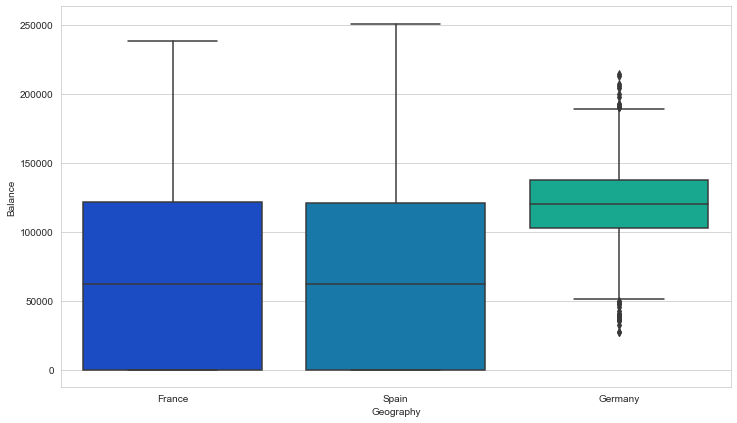

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Geography',y='Balance',data=Churn,palette='winter')  #germany has greater balance than other two

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

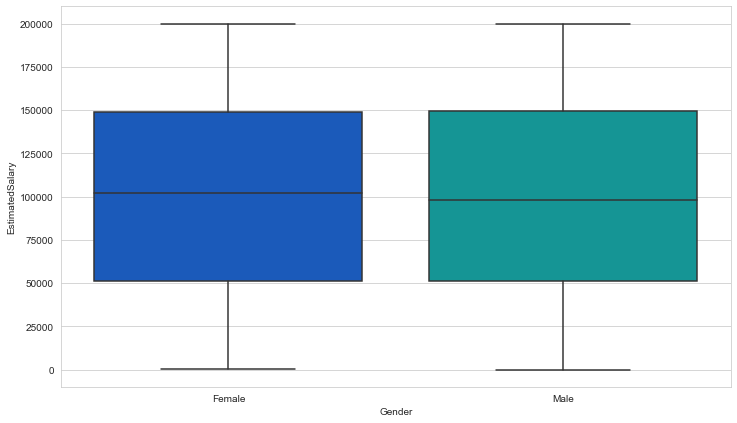

In [17]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender',y='EstimatedSalary',data=Churn,palette='winter')

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

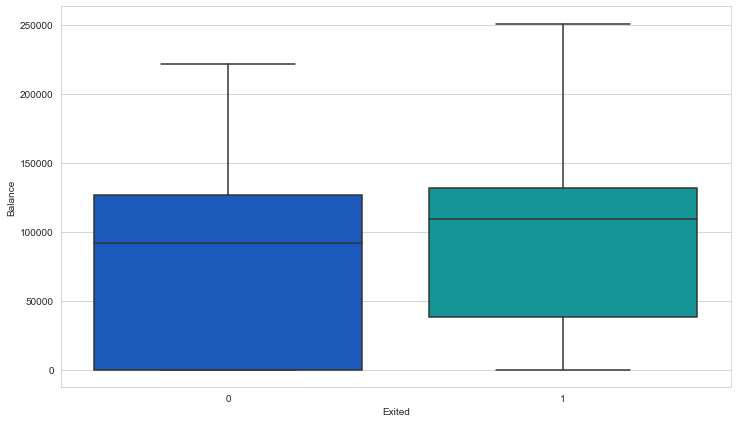

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Exited',y='Balance',data=Churn,palette='winter')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [20]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
Gender = pd.get_dummies(Churn['Gender'],drop_first=True)   #It uses one-hot encoding. Convert categorical variable into dummy/indicator variables.
Geo = pd.get_dummies(Churn['Geography'],drop_first=True)   #we use drop first as we delete the first column generated. If we get male=0 then it is known that person is female. so no need for another column to mention female=1. Hence deleting this unnecessary coln.

In [16]:
Geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [17]:
Churn.drop(['Gender','Geography'],axis=1,inplace=True)  #deleting the existing colmns and adding the one-hot encoded ones.

In [18]:
Churn = pd.concat([Churn,Gender,Geo],axis=1)

In [19]:
Churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Churn.drop('Exited',axis=1), 
                                                    Churn['Exited'], test_size=0.20, 
                                                    random_state=111)
#Target varaible is Exited. X=All data without exited. Y= only Exited

## Training and Predicting

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [24]:
logmodel.coef_

array([[-4.96882023e-03,  4.32384871e-02, -1.87742374e-03,
         3.37333865e-06, -5.58760190e-04, -1.61053869e-04,
        -1.42796639e-03, -1.34413304e-06, -1.08800811e-03,
         9.43632366e-04, -2.98233743e-04]])

In [25]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

In [26]:
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Let's move on to evaluate our model!

In [27]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,1558,391
1,34,17


## Evaluation

We can check precision,recall,f1-score using classification report!

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,predictions))

[[1558   34]
 [ 391   17]]


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1592
           1       0.33      0.04      0.07       408

    accuracy                           0.79      2000
   macro avg       0.57      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000



In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc  #using the roc curve as the accuracy of 0.79 is wrongly predicted  due to null/dummy values. ROC curve gives accurate prediction.

0.5101549413735343

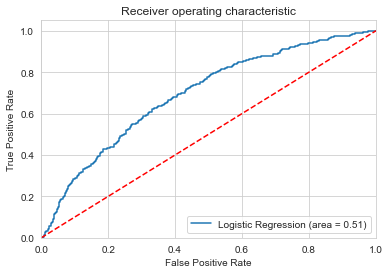

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [36]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.5101549413735343

In [37]:
logmodel.predict_proba(X_test)

array([[0.79615806, 0.20384194],
       [0.48386886, 0.51613114],
       [0.94568225, 0.05431775],
       ...,
       [0.61964371, 0.38035629],
       [0.94264986, 0.05735014],
       [0.91086614, 0.08913386]])

In [38]:
logmodel.predict_proba(X_test)[:,1]

array([0.20384194, 0.51613114, 0.05431775, ..., 0.38035629, 0.05735014,
       0.08913386])

In [39]:
logmodel.predict_proba(X_test)[:,1]>0.4  #trying to increase the accuracy by taking more area under the curve

array([False,  True, False, ..., False, False, False])

In [31]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21   #after trying for many numbers, the optimal number turns out to be 0.21 where there is maximum accuracy
logical

array([False,  True, False, ...,  True, False, False])

In [32]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1     

In [40]:
roc_auc_score(y_test,pred)  #64.18% accuracy

0.6418366341511479

In [41]:
print(confusion_matrix(y_test,pred))

[[1033  559]
 [ 149  259]]


In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      1592
           1       0.32      0.63      0.42       408

    accuracy                           0.65      2000
   macro avg       0.60      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000



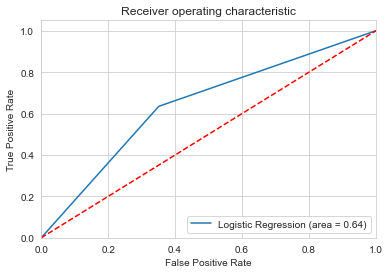

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()